In [ ]:
# Import base libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [ ]:
# Import task libraries

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Read in data

df = pd.read_csv('dataframe_modified.csv')

In [ ]:
# View the data

df

,event,userId,movieId,rating,timestamp,age,gender,occupation,zipcode,movieTitle,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,196_242,196,242,3,881250949,49,M,writer,55105,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
1,186_302,186,302,3,891717742,39,F,executive,55414,L.A. Confidential (1997),...,0,1,0,0,1,0,0,1,0,0
2,22_377,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),...,0,0,0,0,0,0,0,0,0,0
3,244_51,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),...,0,0,0,0,0,1,0,0,1,1
4,166_346,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880_476,880,476,3,880175444,13,M,student,83702,"First Wives Club, The (1996)",...,0,0,0,0,0,0,0,0,0,0
99996,716_204,716,204,5,879795543,36,F,administrator,44265,Back to the Future (1985),...,0,0,0,0,0,0,1,0,0,0
99997,276_1090,276,1090,1,874795795,21,M,student,95064,Sliver (1993),...,0,0,0,0,0,0,0,1,0,0
99998,13_225,13,225,2,882399156,47,M,educator,29206,101 Dalmatians (1996),...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Describe the data

df.describe()

,userId,movieId,rating,timestamp,age,year,unknown,action,adventure,animation,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,32.969850,1988.012850,0.0001,0.255890,0.137530,0.036050,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,330.798356,1.125674,5.343856e+06,11.562623,14.092229,0.0100,0.436362,0.344408,0.186416,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,1.000000,1.000000,8.747247e+08,7.000000,1930.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,24.000000,1986.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,30.000000,1994.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,40.000000,1996.000000,0.0000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,73.000000,2026.000000,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
# Convert numerical categories into strings

df_edit = df
df_edit['str_user'] = df_edit['userId']
df_edit['str_movie'] = df_edit['movieId']
df_edit['str_year'] = df_edit['year']
df_edit['str_user'] = df_edit['str_user'].astype(str)
df_edit['str_movie'] = df_edit['str_movie'].astype(str)
df_edit['str_year'] = df_edit['str_year'].astype(str)

In [ ]:
# Check data types for converted features

df_edit['str_movie'].dtypes

dtype('O')

In [ ]:
# Generate one-hot encoded features

df_hot = pd.get_dummies(df_edit[['str_user','str_movie','gender','occupation','str_year']])

In [ ]:
# View one hot encoded dataframe

df_hot

,str_user_1,str_user_10,str_user_100,str_user_101,str_user_102,str_user_103,str_user_104,str_user_105,str_user_106,str_user_107,...,str_year_1991,str_year_1992,str_year_1993,str_year_1994,str_year_1995,str_year_1996,str_year_1997,str_year_1998,str_year_2022,str_year_2026
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Describe the one hot encoded dataframe

df_hot.describe()

,str_user_1,str_user_10,str_user_100,str_user_101,str_user_102,str_user_103,str_user_104,str_user_105,str_user_106,str_user_107,...,str_year_1991,str_year_1992,str_year_1993,str_year_1994,str_year_1995,str_year_1996,str_year_1997,str_year_1998,str_year_2022,str_year_2026
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002720,0.001840,0.000590,0.000670,0.002160,0.000290,0.001110,0.000230,0.00064,0.000220,...,0.01899,0.023130,0.066570,0.088930,0.105080,0.197080,0.173930,0.009910,0.000540,0.000020
std,0.052083,0.042856,0.024283,0.025876,0.046426,0.017027,0.033298,0.015164,0.02529,0.014831,...,0.13649,0.150317,0.249277,0.284644,0.306658,0.397795,0.379051,0.099055,0.023232,0.004472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Get the names of one hot encoded dataframe

df_hot_columns = df_hot.columns.values.tolist()

df_features = pd.DataFrame(df_hot_columns,columns=['Features'])

#df_features

#df_features.to_csv('features.csv', sep='\t')

In [ ]:
# Scale the remaining features as necessary

df_scales = pd.concat([df['age']],axis=1)

df_scales

scaler = MinMaxScaler()

scaler.fit(df_scales)

df_scales['age'] = scaler.transform(df_scales)

df_scales.describe()

,age
count,100000.000000
mean,0.393483
std,0.175191
min,0.000000
25%,0.257576
50%,0.348485
75%,0.500000
max,1.000000


In [ ]:
# Index dataframe elements

df1_names = ['rating','event']

df2_names = ['age']

df3_names = ['gender_M']

df4_names = df_hot.iloc[:,1:943].columns.values

df5_names = df_hot.iloc[:,944:2625].columns.values

df6_names = df_hot.iloc[:,2628:2648].columns.values

df7_names = df_hot.iloc[:,2649:2719].columns.values

df8_names = ['action','adventure','animation','children','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi',
             'thriller','war','western']

In [ ]:
# Create a feature dataframe

#df_matrix = pd.concat([df[df1_names],df_scales[df2_names],df_hot[df3_names],df_hot[df4_names],df_hot[df5_names],df_hot[df6_names],df_hot[df7_names],df[df8_names]],axis=1)

df_matrix = pd.concat([df[df1_names],df_hot[df4_names],df_hot[df5_names]],axis=1)

In [ ]:
# View the feature dataframe

df_matrix

,rating,event,str_user_10,str_user_100,str_user_101,str_user_102,str_user_103,str_user_104,str_user_105,str_user_106,...,str_movie_990,str_movie_991,str_movie_992,str_movie_993,str_movie_994,str_movie_995,str_movie_996,str_movie_997,str_movie_998,str_movie_999
0,3,196_242,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,186_302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,22_377,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,244_51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,166_346,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,880_476,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,5,716_204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,276_1090,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,2,13_225,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get the names of feature matrix

df_matrix_columns = df_matrix.columns.values.tolist()

df_matrix_features = pd.DataFrame(df_matrix_columns,columns=['Features'])

#df_matrix_features

#df_matrix_features.to_csv('matrix_features.csv', sep='\t')

In [ ]:
# Describe the full matrix

df_matrix.describe()

,rating,str_user_10,str_user_100,str_user_101,str_user_102,str_user_103,str_user_104,str_user_105,str_user_106,str_user_107,...,str_movie_990,str_movie_991,str_movie_992,str_movie_993,str_movie_994,str_movie_995,str_movie_996,str_movie_997,str_movie_998,str_movie_999
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000
mean,3.529860,0.001840,0.000590,0.000670,0.002160,0.000290,0.001110,0.000230,0.00064,0.000220,...,0.000330,0.000250,0.000040,0.000660,0.000070,0.000310,0.000140,0.000160,0.000160,0.0001
std,1.125674,0.042856,0.024283,0.025876,0.046426,0.017027,0.033298,0.015164,0.02529,0.014831,...,0.018163,0.015809,0.006324,0.025682,0.008366,0.017604,0.011831,0.012648,0.012648,0.0100
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


In [ ]:
# Create the variable sets

y = df_matrix['rating']

x = df_matrix.iloc[:,2:]

In [ ]:
# Parition the datasets

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.9, random_state=0)

In [ ]:
# Build the model

regr = MLPRegressor(hidden_layer_sizes=(100),
                    activation="identity",
                    solver="adam",
                    alpha=0.0001,
                    batch_size=200,
                    learning_rate_init=0.001,
                    max_iter=20,
                    random_state=0
                    ).fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


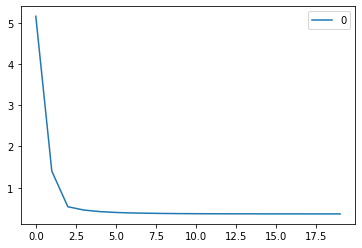

In [ ]:
# Plot the loss curve

pd.DataFrame(regr.loss_curve_).plot()

In [ ]:
# Predict movie ratings

y_pred = regr.predict(x_val)

In [ ]:
# Score the model

regr.score(x_val, y_val)

0.12754946730940298

In [ ]:
# Evaluate the model against the validation set

rmse = np.sqrt(mean_squared_error(y_val, y_pred))

mae = mean_absolute_error(y_val, y_pred)

print(rmse)
print(mae)

1.050619406750899
0.8251640387970072


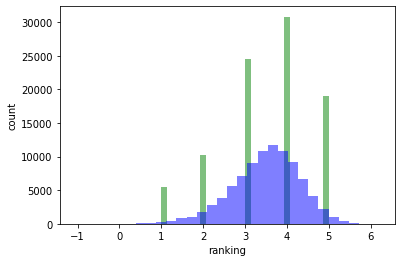

In [ ]:
# Visualize the model performance

h_true = plt.hist(y_val, bins=30, facecolor="green", alpha=0.5)
h_pred = plt.hist(y_pred, bins=30, facecolor="blue", alpha=0.5)
plt.xlabel("ranking")
plt.ylabel("count")
#plt.legend("True", "Predicted")
plt.show()